In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
var=pd.read_csv("HousePrice.csv")

In [31]:
print(var.keys())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')


In [32]:
print(var.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [33]:
var.shape

(2919, 13)

In [34]:
obj=(var.dtypes=='object')
obj_cols=list(obj[obj].index)
print("Catergorial variables:",len(obj_cols))
                                   
int_=(var.dtypes=='int')
num_cols=list(int_[int_].index)
print("Integer variables:",len(num_cols))

f1=(var.dtypes=='float')
f1_cols=list(f1[f1].index)
print("Float variables:",len(f1_cols))

Catergorial variables: 4
Integer variables: 0
Float variables: 3


# Heatmap

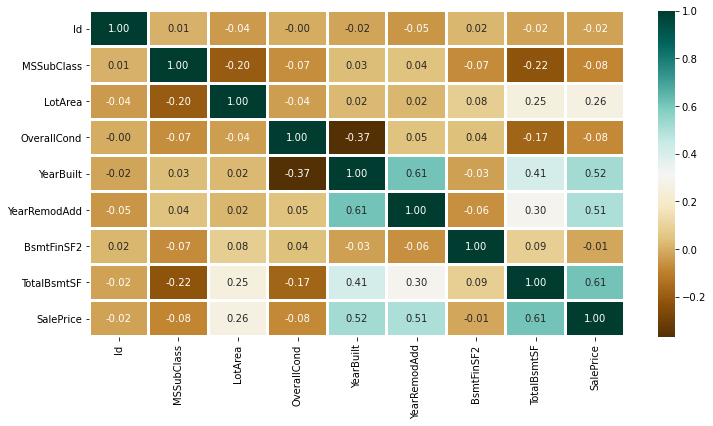

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(var.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)
plt.show()

# Barplot

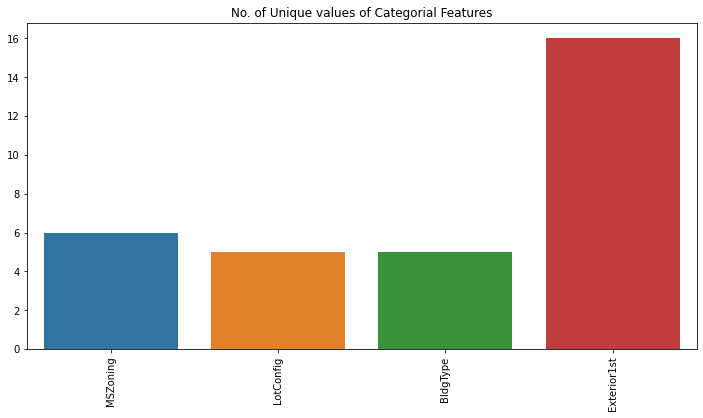

In [47]:
unique_values=[]
for col in obj_cols:
    unique_values.append(var[col].unique().size)
plt.figure(figsize=(12,6))
plt.title('No. of Unique values of Categorial Features')
plt.xticks(rotation=90)
sns.barplot(x=obj_cols,y=unique_values)
plt.show()

# Bargraph for each category

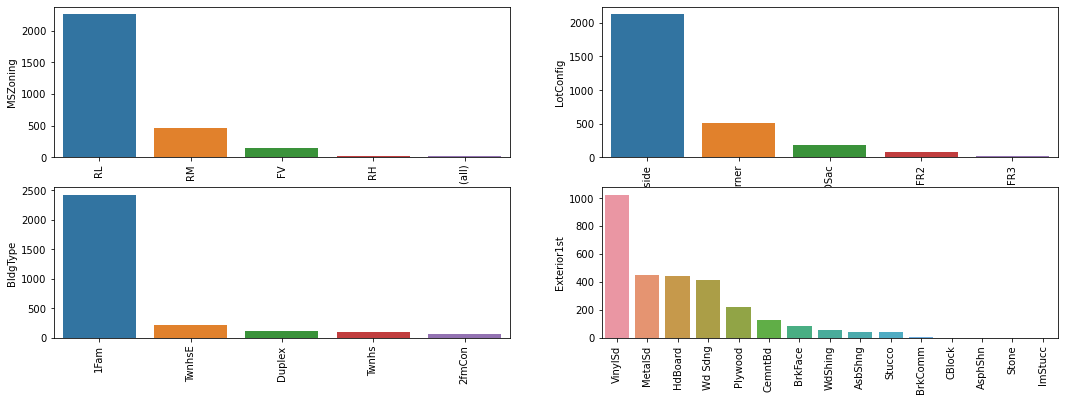

In [57]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features : Distribution')
plt.xticks(rotation=90)
index=1

for col in obj_cols:
    y=var[col].value_counts()
    plt.subplot(11,2,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1

# Data Cleaning

In [58]:
var.drop(['Id'],axis=1,inplace=True)

In [59]:
var['SalePrice']=var['SalePrice'].fillna(var['SalePrice'].mean())

In [60]:
new_var=var.dropna()

In [61]:
new_var.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# OneHotEncoder

In [63]:
from  sklearn.preprocessing import OneHotEncoder
s=(new_var.dtypes=='object')
obj_cols=list(s[s].index)
print('Categorial variables:')
print(obj_cols)
print('No.of catergorial features:',len(obj_cols))

Categorial variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No.of catergorial features: 4


In [68]:
OH_encoder = OneHotEncoder(sparse_output=False, drop='first')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_var[obj_cols]))
OH_cols.index = new_var.index
feature_names = OH_encoder.get_feature_names_out(input_features=obj_cols)
OH_cols.columns = feature_names
df_final = new_var.drop(obj_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


# Splitting  Dataset into Training and Testing

In [69]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X=df_final.drop(['SalePrice'],axis=1)
Y=df_final['SalePrice']

X_train , X_valid , Y_train , Y_valid=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

# Model and Accuracy

# ->Using regression models


# 1.SVM(Support Vector Machine)

In [70]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR=svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred=model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid,Y_pred))

0.18705129312859367


# 2.Random Forest Regression

In [72]:
from sklearn.ensemble import RandomForestRegressor

model_RFR=RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train,Y_train)
Y_pred=model_RFR.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid,Y_pred))


0.19271232562448262


# 3.Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression

model_LR=LinearRegression()
model_LR.fit(X_train,Y_train)
Y_pred=model_LR.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid,Y_pred))

0.1874202546342838


# Clearly , SVM model is  giving better accuracy as the mean absolute error is the least among all the order regressor models i.e , 0.18 approx